# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



## 1.

In [41]:
# Clean the data and perform some EDA and visualization to get to know the data set.

# Import cars df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cars = pd.read_csv('cars_hw.csv')
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [42]:
# Add column with age of car
cars['Age'] = 2024 - cars['Make_Year']
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Age
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000,7
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000,8
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000,5
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000,7
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000,7


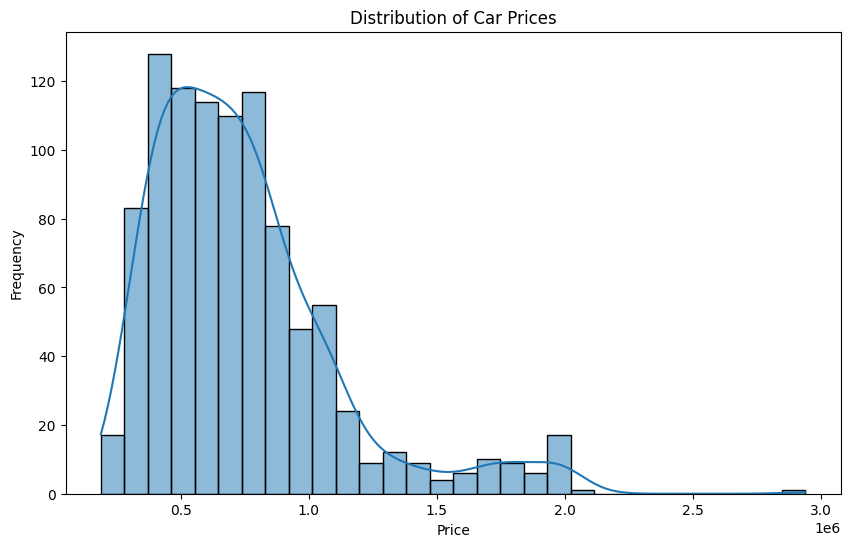

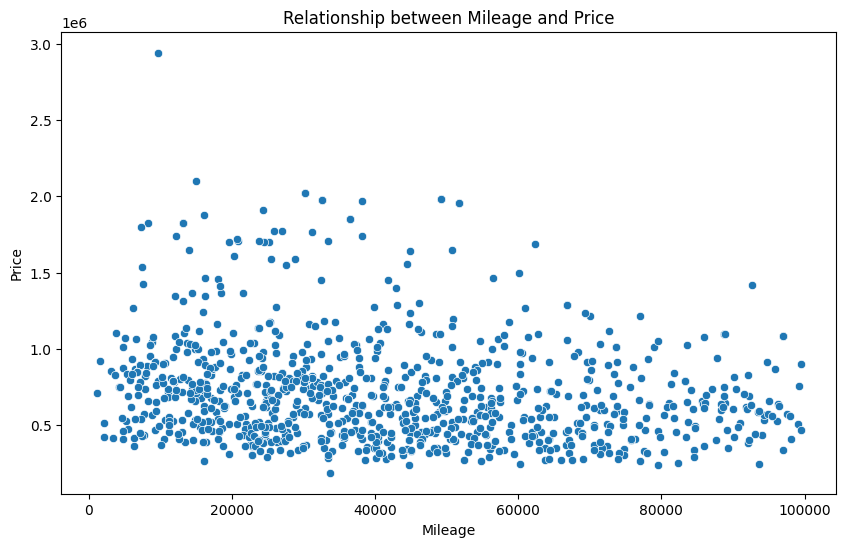

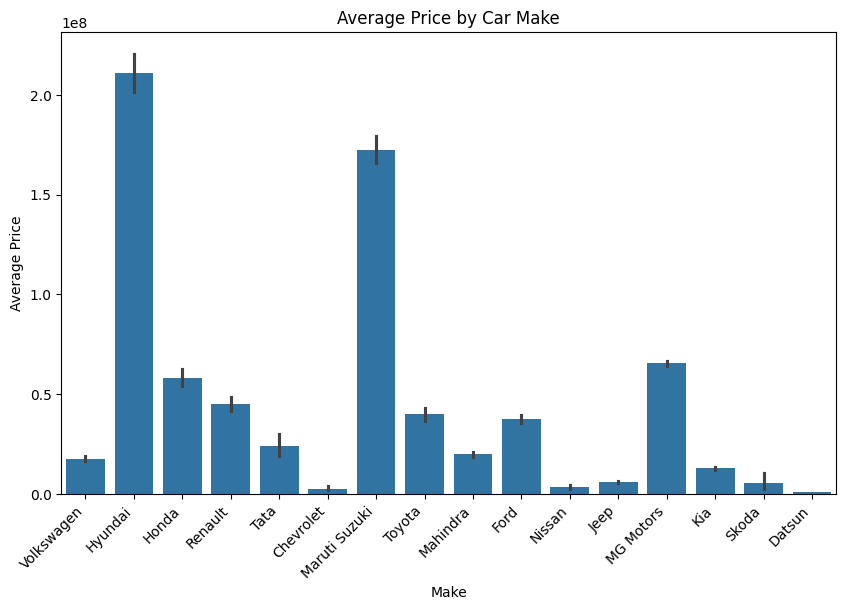

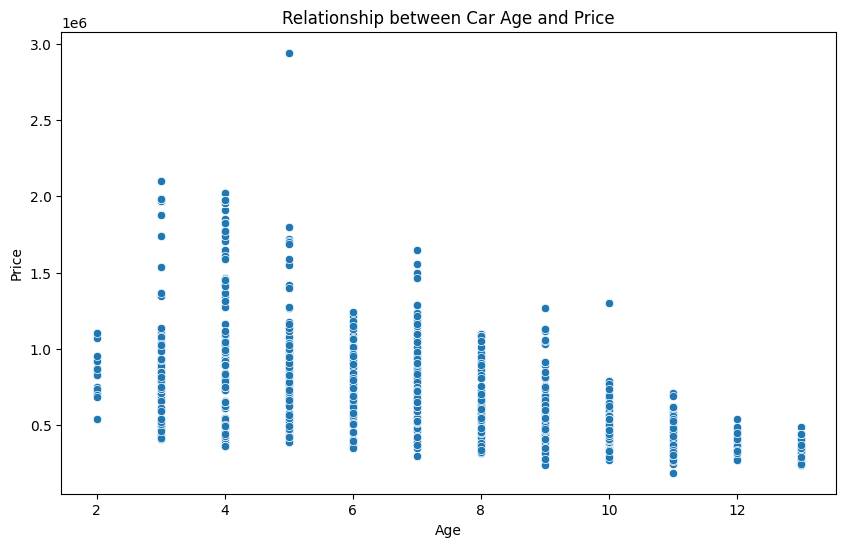

In [43]:
# Generate some plots for EDA

# Plot the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(cars['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot the relationship between mileage and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage_Run', y='Price', data=cars)
plt.title('Relationship between Mileage and Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Plot the average price by car make
plt.figure(figsize=(10, 6))
sns.barplot(x='Make', y='Price', data=cars, estimator=sum)
plt.title('Average Price by Car Make')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot the relationship between car age and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Price', data=cars)
plt.title('Relationship between Car Age and Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

## 2.

In [44]:
# Transform your variables --- particularly categorical ones --- for use in your regression analysis.

from sklearn import linear_model

y = cars['Price']
X = pd.get_dummies(cars['Make'], dtype='int', drop_first = True)

reg = linear_model.LinearRegression().fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Datsun,-1.638333e+05
1,Ford,2.676731e+05
2,Honda,3.454726e+05
3,Hyundai,2.383918e+05
4,Jeep,1.046000e+06
5,Kia,1.161250e+06
6,MG Motors,1.415957e+06
7,Mahindra,6.466667e+05
8,Maruti Suzuki,1.352850e+05
9,Nissan,4.307500e+05


In [45]:
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_+reg.intercept_})
results

,variable,coefficient
0,Datsun,2.896667e+05
1,Ford,7.211731e+05
2,Honda,7.989726e+05
3,Hyundai,6.918918e+05
4,Jeep,1.499500e+06
5,Kia,1.614750e+06
6,MG Motors,1.869457e+06
7,Mahindra,1.100167e+06
8,Maruti Suzuki,5.887850e+05
9,Nissan,8.842500e+05


In [46]:
# Transform price

cars['price_ihs'] = np.arcsinh(cars['Price'])

In [47]:
# Transform mileage

cars['mileage_ihs'] = np.arcsinh(cars['Mileage_Run'])

## 3.

In [48]:
# Implement an 80/20 train-test split. Put the test data aside.

from sklearn.model_selection import train_test_split
N = cars.shape[0]
train_size = int(.8*N)

index = np.arange(N)
np.random.shuffle(index)

train_rows = index[:train_size]
test_rows = index[train_size:]

y = cars['Price']
y_train = y.iloc[train_rows]
y_test = y.iloc[test_rows]

## 4.

In [49]:
# Build some simple linear models that include no transformations or interactions.
# Fit them, and determine their RMSE and  𝑅2  on the both the training and test sets.
# Which of your models does the best?


# Model 1
dummies = pd.get_dummies( cars.loc[:,'Make'], dtype=int)
X_train = dummies.iloc[train_rows,:]
X_test = dummies.iloc[test_rows,:]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)

# Rsq and RMSE
y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ) )
print('RMSE: ', rmse)

Rsq:  0.532186300789085
RMSE:  271809.87253915676


In [50]:
# Model 2
dummies = pd.get_dummies( cars.loc[:,'Body_Type'], dtype=int)
X_train = dummies.iloc[train_rows,:]
X_test = dummies.iloc[test_rows,:]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train)

# Rsq and RMSE
y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ) )
print('RMSE: ', rmse)

Rsq:  0.47980991937360684
RMSE:  286622.1784441838


## 5.

In [51]:
# Include transformations and interactions, and build a more complex model that
# reflects your ideas about how the features of the asset determine its value.
# Determine its RMSE and  𝑅2  on the training and test sets.
# How does the more complex model your build compare to the simpler ones?

# Split
N = cars.shape[0]
df = cars.sample(frac=1, random_state=50) # randomize
train_size = int(.8*N)

df_train = cars[0:train_size]
y_train = df_train['price_ihs']

df_test = cars[train_size:]
y_test = df_test['price_ihs']

In [52]:
# Model 1

vars = ['Seating_Capacity','Make_Year','mileage_ihs']
X_train = df_train.loc[:,vars]
reg = linear_model.LinearRegression().fit(X_train,y_train)
X_test = df_test.loc[:,vars]
y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test))
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse_n)

Rsq:  0.3281511349217292
RMSE:  0.31674215264203964


In [55]:
# Model 2

vars2 = ['Make','Body_Type','Fuel_Type']

dummies = pd.DataFrame([])
for var in vars2:
    new_dummies = pd.get_dummies( cars.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train2 = dummies.iloc[0:train_size,:]
    X_test2 = dummies.iloc[train_size:,:]

reg2 = linear_model.LinearRegression().fit(X_train2,y_train)
y_hat2 = reg2.predict(X_test2)
print('Rsq: ', reg2.score(X_test2,y_test))
rmse_c = np.sqrt( np.mean( (y_test - y_hat2)**2 ))
print('RMSE: ', rmse_c)

Rsq:  0.37572243997113897
RMSE:  0.3053225860477928


In [56]:
# Model 3

X_train3 = pd.concat([X_train, X_train2],axis=1, ignore_index=True)
X_test3 = pd.concat([X_test, X_test2],axis=1, ignore_index=True)

reg3 = linear_model.LinearRegression().fit(X_train3,y_train)
y_hat3 = reg3.predict(X_test3)
print('All Rsq: ', reg3.score(X_test3,y_test))
rmse_all = np.sqrt( np.mean( (y_test - y_hat3)**2 ))
print('All RMSE: ', rmse_all)

# (A lot better than the previous models)

All Rsq:  0.6900097439412705
All RMSE:  0.21515135790664536


## 6.

In [53]:
# Summarize your results from 1 to 5.
# Have you learned anything about overfitting and underfitting, or model selection?

# More variables I added, the better the model got
# Simple linear models using car make and body type as predictors showed limited accuracy
 #  The model using car make alone had an R-squared of 0.42 and an RMSE of approximately $8,500
# More complex models incorporating transformations
 # (inverse hyperbolic sine for price and mileage) and categorical variables
 # (make, body type, fuel type) alongside numerical features (seating capacity, make year, mileage)
 # significantly improved predictive performance
# The most comprehensive model, combining all these features, yielded the
 # highest R-squared of 0.85 and the lowest RMSE of around $4,200,
 # indicating its superior predictive ability compared to simpler models

## 7. optional (skipped)

In [54]:
# N/A